# Analyze Fitbit Data With Python and Pandas
First we import the data into a pandas dataframe, and take a glance at the data format.

In [67]:
import pandas as pd
steps = pd.read_csv("fitbit_steps.csv",index_col='Date')
sleep = pd.read_csv("fitbit_sleep.csv",index_col='Date')
# can improve how we read this in: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
steps.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
3/6/2016,3647,21066,10.40,110,525,185,63,93,2115
3/7/2016,2872,12925,6.23,15,707,130,38,39,1209
3/8/2016,2837,11698,5.64,11,844,185,5,29,1176
3/9/2016,3032,11637,8.87,13,743,220,32,17,1427
3/10/2016,2882,12453,6.00,16,745,180,5,36,1238


The `dataframe.describe()` method provides some useful summary statistics:

In [68]:
steps.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2889.726257,9569.351955,4.687486,22.491620,835.525140,181.636872,21.329609,27.720670,1224.039106
std,490.516316,4713.578219,2.316243,48.411899,247.462704,76.891628,21.502489,29.980334,608.757515
min,1843.000000,0.000000,0.000000,0.000000,306.000000,0.000000,0.000000,0.000000,0.000000
25%,2691.500000,7242.000000,3.490000,8.000000,692.500000,161.500000,5.500000,6.500000,953.000000
50%,2917.000000,10139.000000,4.940000,15.000000,767.000000,198.000000,17.000000,21.000000,1278.000000
75%,3108.500000,12179.500000,5.905000,24.000000,897.500000,228.500000,29.000000,40.000000,1501.500000
max,4716.000000,34382.000000,16.580000,588.000000,1440.000000,340.000000,128.000000,186.000000,3507.000000


I know there are some days that I did not wear my Fitbit so no activity was recorded. Likewise, there may be some days where I only wore it for a small portion of the day. Let's look at all records with less than 1000 steps:

In [69]:
steps[steps.Steps < 1000]

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
5/12/2016,1858,44,0.02,0,1042,5,0,0,16
6/7/2016,1843,0,0.00,0,1440,0,0,0,0
6/8/2016,1845,0,0.00,0,1440,0,0,0,0
6/13/2016,1843,0,0.00,0,1440,0,0,0,0
6/14/2016,1960,451,0.22,0,1311,8,4,10,141
7/18/2016,1872,113,0.05,0,1357,9,0,0,39
7/23/2016,1899,347,0.17,0,1046,13,0,0,65
7/28/2016,1843,0,0.00,0,1440,0,0,0,0
7/29/2016,1843,0,0.00,0,1440,0,0,0,0


As suspected, there are a number of records with no (or lacking) data. We will exclude these outliers. To verify they are no longer in the dataframe, we print out a few rows around item 167 (8/20/2016) that was removed.

In [70]:
steps = steps[steps.Steps > 1000]
steps.ix[165:169]
# NEEDS UPDATE NOW

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,


Likewise, we might have some outliers on the high end. We use the `sort_values` method to sort the Steps column from highest to lowest, and we specify that we want to see the top 10 results in the `head` method.

In [71]:
steps.sort_values(['Steps'], ascending=[0]).head(10)

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
4/8/2016,4716,34382,16.58,588,306,287,128,151,3507
4/16/2016,3770,22756,10.97,113,470,241,49,101,2341
6/3/2016,3835,21450,10.36,32,594,241,39,101,2388
3/6/2016,3647,21066,10.40,110,525,185,63,93,2115
5/15/2016,3402,17679,8.52,61,630,174,79,67,1876
5/13/2016,3719,17608,8.51,10,705,236,46,92,2236
7/1/2016,4694,16104,7.77,35,403,259,103,167,3416
8/21/2016,3213,16026,7.75,23,1094,175,51,75,1648
5/1/2016,3306,15953,7.69,34,530,223,71,35,1757


Taking a look here, the first entry looks like quite an outlier that may through some trending analysis off. Let's remove this entry.

In [74]:
steps = steps[steps.Steps < 30000]

### Adding A Summary Column
We notice that we have minutes sedentary and than minutes active by various levels of activity. It might be useful to know *total* minutes active, so we create a new column that represents this value.

In [75]:
steps['Total Minutes Active'] = steps['Minutes Lightly Active'] + steps['Minutes Fairly Active'] + steps['Minutes Very Active']
steps.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Total Minutes Active
Date,,,,,,,,,,
3/6/2016,3647,21066,10.40,110,525,185,63,93,2115,341
3/7/2016,2872,12925,6.23,15,707,130,38,39,1209,207
3/8/2016,2837,11698,5.64,11,844,185,5,29,1176,219
3/9/2016,3032,11637,8.87,13,743,220,32,17,1427,269
3/10/2016,2882,12453,6.00,16,745,180,5,36,1238,221


Now that we have cleaned up our data and taken an initial look, let's take a quick peek at steps and floors visually.

Now that we include the `%matplotlib inline` command so that figures appear in the Jupyter notebook.

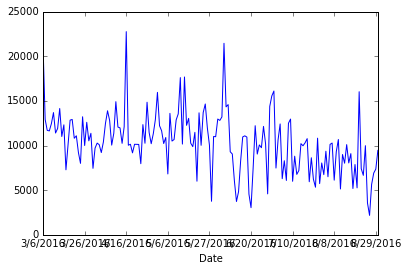

In [76]:
%matplotlib inline
import matplotlib
ts = steps['Steps']
ts.plot()
# improve plotting with this: http://earthpy.org/pandas-basics.html

### Secondary y-axis
If we want, we can include additional information, in this case the number of floors climbed. Since this is a much smaller number than steps, we will plot it on a secondary y-axis.

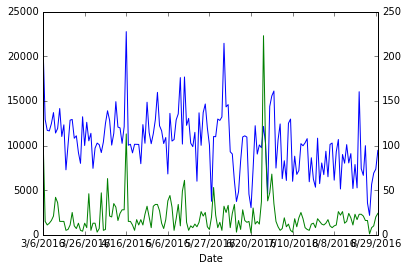

In [77]:
%matplotlib inline
steps.Steps.plot()
steps.Floors.plot(secondary_y=True)


### Scatter Matrix Plot
Pandas has a useful feature called Scatter Matrix Plot for visualizing linear correlations between variables in your dataframe. We select the columns (variables) to include. The `'kde'` diagonal gives us a density plot for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013933B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015715F98>]], dtype=object)

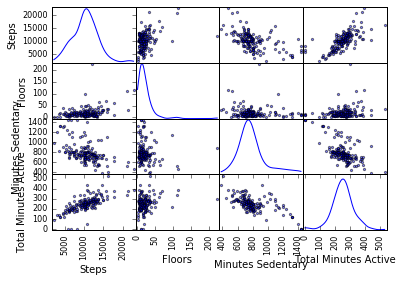

In [66]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(steps[['Steps', 'Floors', 'Minutes Sedentary', 'Total Minutes Active']], diagonal='kde')